# Initial corpus preprocessing

Preprocessing of Labour speeches dataset. 

### To do:
- import data
- split speeches into individual sentences (these will be the documents)
- tokenise each document
- identify key stop words
### Done?:
- import data
- split speeches into individual sentences (these will be the documents)


In [134]:
# import modules
from time import time
import pandas as pd
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import gensim
import re
import matplotlib.pyplot as plt

% matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\medacola\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\medacola\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [135]:
# import data
df = pd.read_pickle('labour_speeches.pkl')

# show data to check
df.head()

,Speech,Year,Link,Speech_text
0,"Leader's speech, Brighton 2017",2017,http://britishpoliticalspeech.org/speech-archi...,"We meet here this week as a united Party, adva..."
1,"Leader's speech, Liverpool 2016",2016,http://britishpoliticalspeech.org/speech-archi...,Thank you for that introduction. And how brill...
2,"Leader's speech, Brighton 2015",2015,http://britishpoliticalspeech.org/speech-archi...,"Friends, thank you so much for that incredible..."
3,"Leader's speech, Manchester 2014",2014,http://britishpoliticalspeech.org/speech-archi...,It’s great to be at Labour Party Conference in...
4,"Leader's speech, Brighton 2013",2013,http://britishpoliticalspeech.org/speech-archi...,It's great to be in Brighton. And I want to st...


In [136]:
# lets specify a test speech to split
test_text = df['Speech_text'][0]

In [137]:
# lets split it by sentences indicated by full stop
test_text.split('.')

['We meet here this week as a united Party, advancing in every part of Britain, winning the confidence of millions of our fellow citizens, setting out our ideas and plans for our country’s future, that have already inspired people of all ages and backgrounds',
 '\n And it’s a privilege to be speaking in Brighton',
 '  A city that not only has a long history of hosting Labour conferences, but also of inspirational Labour activists',
 '\n It was over a century ago, here in Brighton, that a teenage shop worker had had enough of the terrible conditions facing her and her workmates',
 ' She risked the sack to join the Shop Workers’ Union, after learning about it in a newspaper used to wrap up fish and chips, and was so effective at standing up for women shop workers, she became assistant general secretary before the age of 30',
 '\n In that role she seconded the historic resolution at the Trades Union Congress of 1899  to set up the Labour Representation Committee so that working people wou

In [138]:
# how many sentences do we get?
len(test_text.split('.'))

334

In [139]:
# how many sentences for each speech
for x in df['Speech_text']:
    print(len(x.split('.')))

334
275
489
412
445
503
536
382
301
295
340
130
44
436
333
320
411
421
356
441
416
286
487
399
310
380
225
237
331
361
382
295
289
280
299
229
248
215
250
324
290
381
299
363
329
257
263
471
414
384
374
343
357
257
347
256
159
106
159
96
125
198
203


In [140]:
# define a function that will break each speech into individual sentences and create a dataframe of those sentences
def sentence_stripper(dataframe):
    i = 1

    sent_no = []
    
    speech_id = []

    sentences = []
    
    year = []

    for idx in range(len(dataframe['Speech_text'])):
        split_speech = dataframe['Speech_text'][idx].split('.')
        for line in split_speech:
            sent_no.append(i)
            sentences.append(line)
            i = i + 1
            speech_id.append(dataframe['Speech'][idx])
            year.append(dataframe['Year'][idx])
                
    
    new_frame = pd.DataFrame({'Sent_id' : sent_no,
                             'Speech' : speech_id,
                             'Sentence' : sentences,
                             'Year' : year})
    
    return new_frame

In [141]:
# lets use it
transformed_df = sentence_stripper(df)

# lets check output
transformed_df.head()

,Sent_id,Speech,Sentence,Year
0,1,"Leader's speech, Brighton 2017","We meet here this week as a united Party, adva...",2017
1,2,"Leader's speech, Brighton 2017",\n And it’s a privilege to be speaking in Brig...,2017
2,3,"Leader's speech, Brighton 2017",A city that not only has a long history of h...,2017
3,4,"Leader's speech, Brighton 2017","\n It was over a century ago, here in Brighton...",2017
4,5,"Leader's speech, Brighton 2017",She risked the sack to join the Shop Workers’...,2017


In [142]:
transformed_df.head(-5)

,Sent_id,Speech,Sentence,Year
0,1,"Leader's speech, Brighton 2017","We meet here this week as a united Party, adva...",2017
1,2,"Leader's speech, Brighton 2017",\n And it’s a privilege to be speaking in Brig...,2017
2,3,"Leader's speech, Brighton 2017",A city that not only has a long history of h...,2017
3,4,"Leader's speech, Brighton 2017","\n It was over a century ago, here in Brighton...",2017
4,5,"Leader's speech, Brighton 2017",She risked the sack to join the Shop Workers’...,2017
5,6,"Leader's speech, Brighton 2017",\n In that role she seconded the historic reso...,2017
6,7,"Leader's speech, Brighton 2017",\n That became the Labour Party and it was th...,2017
7,8,"Leader's speech, Brighton 2017","And in 1929, the first ever woman to join the...",2017
8,9,"Leader's speech, Brighton 2017",Margaret Bondfield’s story is a reminder of ...,2017
9,10,"Leader's speech, Brighton 2017","\n Conference, against all predictions in June...",2017


## Preprocessing
Tokenization of sentences and stopword removal

In [143]:
# convert sentences to a list
speech_sent = list(transformed_df['Sentence'])

# check it
speech_sent[12380]

' (Applause)\nThe tasks of the modern world need extra prep\xadaration and we can get it by the comprehensive provision of extended education and training for youngsters, with reasonable pay so that they as individuals and their country collectively are bet\xadter able to conquer the challenges of future employment, future, technology, and future development'

In [144]:
# preparing stop words as a set
stop_words = set(stopwords.words('english'))
stop_words.update(['applause'])

len(stop_words)

180

In [145]:
# need to tokenise words 
def doc_to_words(sentences):
    for sentence in sentences:
        # use gensim tokenisation system, doc must be string, deaccent function given as true
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
    
    
speech_sent_tok = list(doc_to_words(speech_sent))

print(speech_sent[12380])

 (Applause)
The tasks of the modern world need extra prep­aration and we can get it by the comprehensive provision of extended education and training for youngsters, with reasonable pay so that they as individuals and their country collectively are bet­ter able to conquer the challenges of future employment, future, technology, and future development


In [146]:
# lemmatisation of tokens

lemma = WordNetLemmatizer()

def lem_word(ws):
    # this function takes a list of lists of tokens
    return [[lemma.lemmatize(token) for token in tokens] for tokens in ws]
    
speech_sent_tok = lem_word(speech_sent_tok)

speech_sent_tok[12380]

['applause',
 'the',
 'task',
 'of',
 'the',
 'modern',
 'world',
 'need',
 'extra',
 'prep',
 'aration',
 'and',
 'we',
 'can',
 'get',
 'it',
 'by',
 'the',
 'comprehensive',
 'provision',
 'of',
 'extended',
 'education',
 'and',
 'training',
 'for',
 'youngster',
 'with',
 'reasonable',
 'pay',
 'so',
 'that',
 'they',
 'a',
 'individual',
 'and',
 'their',
 'country',
 'collectively',
 'are',
 'bet',
 'ter',
 'able',
 'to',
 'conquer',
 'the',
 'challenge',
 'of',
 'future',
 'employment',
 'future',
 'technology',
 'and',
 'future',
 'development']

In [147]:
# stopword removal

def remove_stopwords(text):
    return [[word for word in doc if word not in stop_words] for doc in text]
 
words = remove_stopwords(speech_sent_tok)
 
print(words[12380])

['task', 'modern', 'world', 'need', 'extra', 'prep', 'aration', 'get', 'comprehensive', 'provision', 'extended', 'education', 'training', 'youngster', 'reasonable', 'pay', 'individual', 'country', 'collectively', 'bet', 'ter', 'able', 'conquer', 'challenge', 'future', 'employment', 'future', 'technology', 'future', 'development']


In [148]:
# Add bigrams and trigrams to docs (only ones that appear 10 times or more).

# includes threshold kwarg (threshold score required by bigram)
bigram = gensim.models.phrases.Phrases(words, min_count=10, threshold=100)
trigram = gensim.models.phrases.Phrases(bigram[words], threshold = 100)

for idx in range(len(words)):
    for token in bigram[words[idx]]:
        if '_' in token:
            if token not in words[idx]:
                # Token is a bigram, add to document.
                words[idx].append(token)
    for token in trigram[words[idx]]:
        if '_' in token:
            if token not in words[idx]:
                # Token is a trigram, add to document.
                words[idx].append(token)

C:\Users\medacola\AppData\Local\Continuum\anaconda3\envs\topicmodel1\lib\site-packages\gensim\models\phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [149]:
words[104]

['theresa',
 'may',
 'give',
 'full',
 'guarantee',
 'deserve',
 'today',
 'theresa_may']

[('people', 2032), ('government', 1773), ('year', 1573), ('wa', 1569), ('ha', 1369), ('country', 1354), ('party', 1235), ('britain', 1224), ('labour', 1214), ('u', 1143), ('new', 1105), ('one', 1100), ('time', 925), ('world', 849), ('would', 829), ('tory', 770), ('say', 764), ('work', 737), ('every', 722), ('want', 720), ('policy', 716), ('know', 716), ('make', 708), ('must', 681), ('right', 666), ('need', 657), ('change', 637), ('let', 598), ('way', 589), ('british', 574), ('get', 544), ('last', 518), ('great', 502), ('first', 501), ('economic', 500), ('social', 495), ('said', 492), ('service', 482), ('take', 464), ('election', 459), ('life', 457), ('nation', 455), ('today', 449), ('mean', 444), ('public', 444), ('power', 443), ('go', 442), ('future', 441), ('school', 434), ('child', 433)]


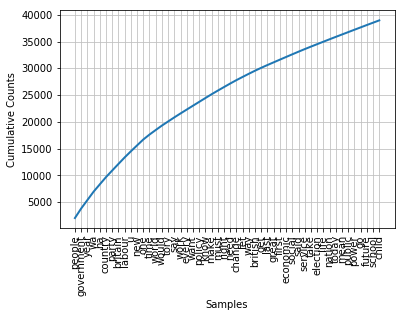

In [150]:
# visualise word frequency
# flatten list of lists into 1D list
flat_list = [item for sublist in words for item in sublist]
# convert text to nltk text object
text = nltk.Text(flat_list)

# frequency of words
fdist = nltk.FreqDist(text)
print(fdist.most_common(50))
fdist.plot(50, cumulative=True)

In [151]:
# combine these tokens into a dataframe
transformed_df.insert(1,'Tokens',words)

In [152]:
# check it looks right
transformed_df.head()

,Sent_id,Tokens,Speech,Sentence,Year
0,1,"[meet, week, united, party, advancing, every, ...","Leader's speech, Brighton 2017","We meet here this week as a united Party, adva...",2017
1,2,"[privilege, speaking, brighton]","Leader's speech, Brighton 2017",\n And it’s a privilege to be speaking in Brig...,2017
2,3,"[city, ha, long, history, hosting, labour, con...","Leader's speech, Brighton 2017",A city that not only has a long history of h...,2017
3,4,"[wa, century, ago, brighton, teenage, shop, wo...","Leader's speech, Brighton 2017","\n It was over a century ago, here in Brighton...",2017
4,5,"[risked, sack, join, shop, worker, union, lear...","Leader's speech, Brighton 2017",She risked the sack to join the Shop Workers’...,2017


In [153]:
transformed_df.to_pickle('labour_speeches_corpus.pkl')